In [1]:
import pandas as pd
file_list = ['P_23_1.csv', 'P_23_2.csv','P_22_1.csv', 'P_22_2.csv','P_21_1.csv',
             'P_21_2.csv','P_20_1.csv', 'P_20_2.csv','P_19_1.csv', 'P_19_2.csv',
             'P_18_1.csv', 'P_18_2.csv','P_17_1.csv', 'P_17_2.csv','P_16_1.csv', 'P_16_2.csv',
            'P_15_1.csv', 'P_15_2.csv','P_14_1.csv', 'P_14_2.csv','P_13_1.csv', 'P_13_2.csv','P_12_1.csv', 'P_12_2.csv']
dtype={'citation_id': int}
combined_data = pd.DataFrame()
for file in file_list:
    df = pd.read_csv(file, low_memory=False)
    combined_data = pd.concat([combined_data, df], ignore_index=True)
    a=combined_data;
    print(a)



       citation_id  date_issue date_creation                 location  \
0        101608371  2023-01-01    2023-01-24              500 16TH ST   
1        101626452  2023-01-01    2023-01-18        3700 VAN DYRE W/A   
2        101640356  2023-01-01    2023-01-18      3100 LINCOLN AVENUE   
3         58987876  2023-01-01    2023-01-01             600 5TH  AVE   
4        101626450  2023-01-01    2023-01-18    W/A 3700 VAN DYKE AVE   
...            ...         ...           ...                      ...   
230201    59697051  2023-06-30    2023-06-30            805 S 47TH ST   
230202    59702995  2023-06-30    2023-06-30  8600 LA JOLLA SHORES DR   
230203    59687295  2023-06-30    2023-06-30       1200 UNIVERSITY AV   
230204    59706403  2023-06-30    2023-06-30       700 ISLAND AVE AVE   
230205    59686842  2023-06-30    2023-06-30              3800 8TH AV   

                    sector1         vio_code                   vio_desc  \
0            CSD (S) POLICE  86.0112(F) SDMC    

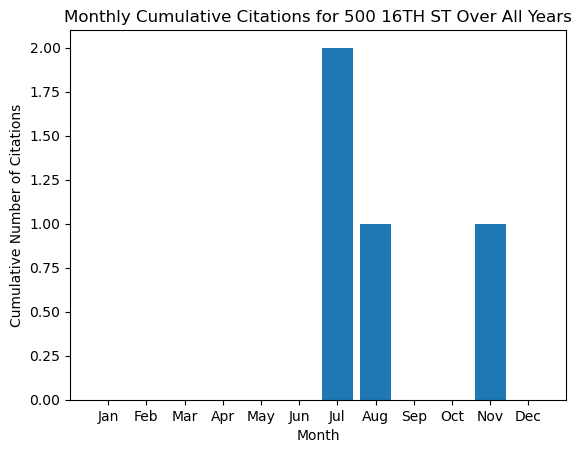

Empty DataFrame
Columns: [citation_id, date_issue, date_creation, location, sector1, vio_code, vio_desc, vio_fine, Month, Year]
Index: []


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# Convert 'date_issue' to datetime type
df['date_issue'] = pd.to_datetime(df['date_issue'])

# Extract 'Month' and 'Year' from the 'date_issue' column
df['Month'] = df['date_issue'].dt.month
df['Year'] = df['date_issue'].dt.year

# Assuming you want to plot for a specific location, replace 'Your Location' with the actual location
target_location = '500 16TH ST'
location_data = df[df['location'] == target_location]

# Group by 'Year' and 'Month' and sum the number of citations
monthly_aggregated = location_data.groupby(['Year', 'Month']).size().reset_index(name='Number of Citations')

# Create a DataFrame with all months and years
all_months_years = pd.DataFrame(
    [(year, month) for year in df['Year'].unique() for month in range(1, 13)],
    columns=['Year', 'Month']
)

# Merge with the aggregated data to ensure all months are included
monthly_aggregated_total = all_months_years.merge(monthly_aggregated, on=['Year', 'Month'], how='left').fillna(0)

# Group by 'Month' and calculate the cumulative sum of the number of citations across all years
monthly_aggregated_total['Cumulative Citations'] = monthly_aggregated_total.groupby('Month')['Number of Citations'].cumsum()

# Plotting the bar graph
plt.bar(monthly_aggregated_total['Month'], monthly_aggregated_total['Cumulative Citations'])

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Cumulative Number of Citations')
plt.title(f'Monthly Cumulative Citations for {target_location} Over All Years')

# Customize the x-axis ticks to represent months (e.g., 'Jan', 'Feb', ..., 'Dec')
plt.xticks(monthly_aggregated_total['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()

jan_feb_data = location_data[(location_data['Month'] == 5) ]

print(jan_feb_data)



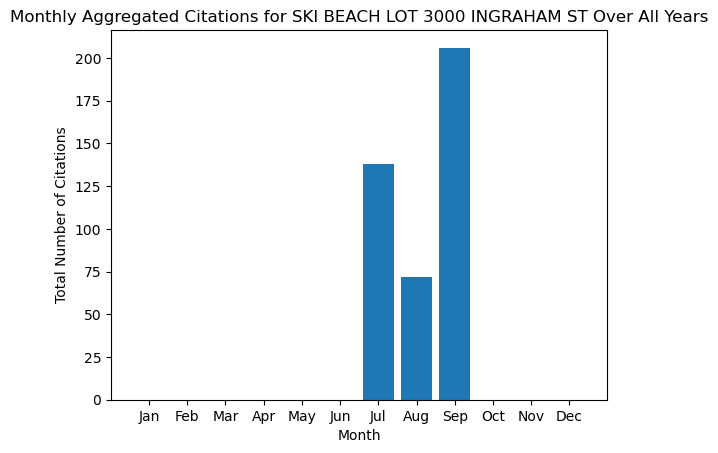

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# Convert 'date_issue' to datetime type
df['date_issue'] = pd.to_datetime(df['date_issue'])

# Extract 'Month' and 'Year' from the 'date_issue' column
df['Month'] = df['date_issue'].dt.month
df['Year'] = df['date_issue'].dt.year

# Assuming you want to plot for a specific location, replace 'Your Location' with the actual location
target_location = 'SKI BEACH LOT 3000 INGRAHAM ST'
location_data = df[df['location'] == target_location]

# Group by 'Year' and 'Month' and sum the number of citations
monthly_aggregated = location_data.groupby(['Year', 'Month']).size().reset_index(name='Number of Citations')

# Create a DataFrame with all months and years
all_months_years = pd.DataFrame(
    [(year, month) for year in df['Year'].unique() for month in range(1, 13)],
    columns=['Year', 'Month']
)

# Merge with the aggregated data to ensure all months are included
monthly_aggregated_total = all_months_years.merge(monthly_aggregated, on=['Year', 'Month'], how='left').fillna(0)

# Group by 'Month' and sum the number of citations across all years
monthly_aggregated_total = monthly_aggregated_total.groupby('Month')['Number of Citations'].sum().reset_index()

# Plotting the bar graph
plt.bar(monthly_aggregated_total['Month'], monthly_aggregated_total['Number of Citations'])

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Number of Citations')
plt.title(f'Monthly Aggregated Citations for {target_location} Over All Years')

# Customize the x-axis ticks to represent months (e.g., 'Jan', 'Feb', ..., 'Dec')
plt.xticks(monthly_aggregated_total['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()


In [ ]:
b12='location'
s12=a[b12].nunique()
print(s12)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

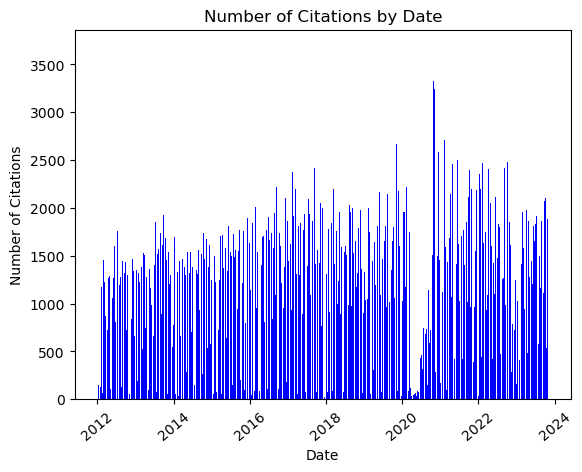

In [4]:
a['date_issue'] = pd.to_datetime(a['date_issue']) 
daily_counts = a['date_issue'].value_counts().sort_index()


plt.bar(daily_counts.index, daily_counts.values, color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Citations')
plt.title('Number of Citations by Date')
plt.xticks(rotation=40)  


plt.show()

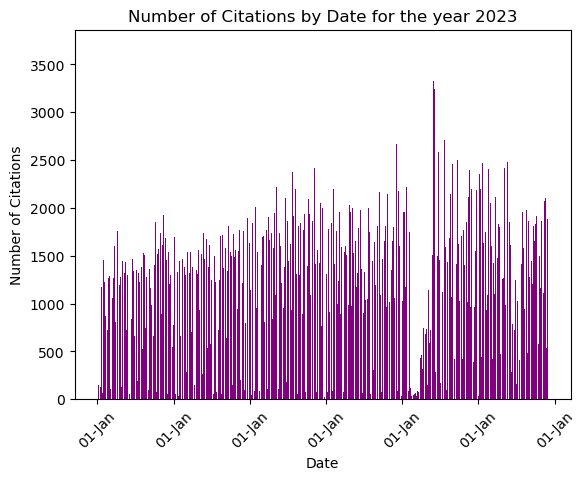

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

a['date_issue'] = pd.to_datetime(a['date_issue'])


daily_counts = a['date_issue'].value_counts().sort_index()

plt.bar(daily_counts.index, daily_counts.values, color='purple')

date_format = DateFormatter("%d-%b")
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('Date')
plt.ylabel('Number of Citations')
plt.title('Number of Citations by Date for the year 2023')
plt.xticks(rotation=45) 

plt.show()


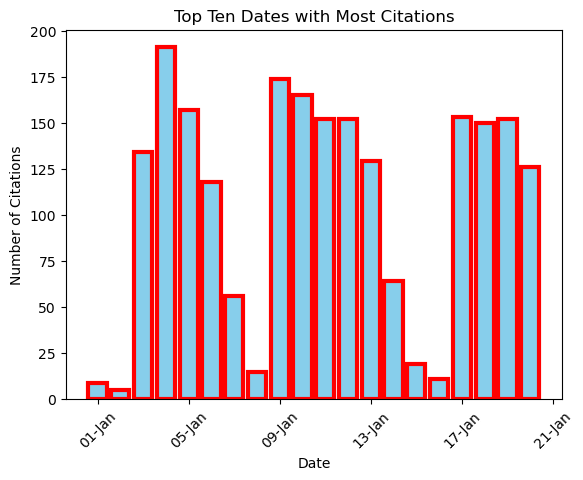

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

a['date_issue'] = pd.to_datetime(a['date_issue']) 

daily_counts = a['date_issue'].value_counts().sort_values(ascending=False).sort_index()

top_ten_dates = daily_counts.head(20)

plt.bar(top_ten_dates.index, top_ten_dates.values, color='skyblue',edgecolor='red',
       linewidth=3)

date_format = DateFormatter("%d-%b")
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('Date')
plt.ylabel('Number of Citations')
plt.title('Top Ten Dates with Most Citations')
plt.xticks(rotation=45) 

plt.show()


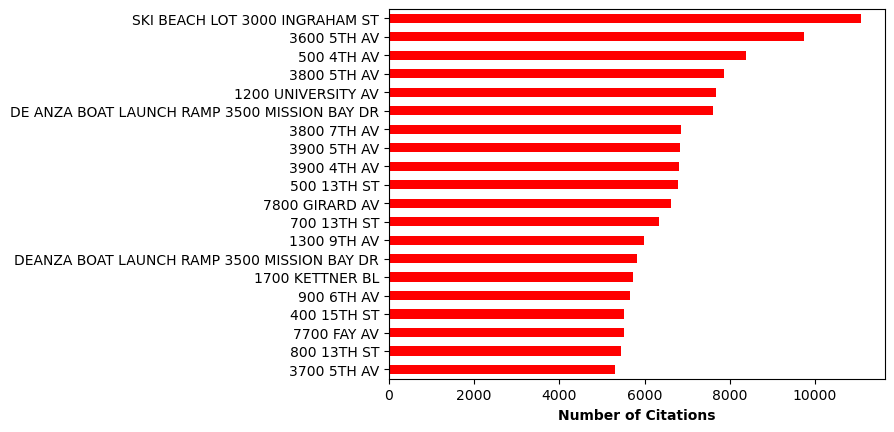

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

a['location'] = a['location'].str.upper()  

location_counts = a['location'].value_counts().sort_values(ascending=False).head(20)
location_counts = location_counts.iloc[::-1]

location_counts.plot(kind='barh', color='red')

plt.xlabel('Number of Citations',fontdict={'fontsize':10,'fontweight':'bold'})
#plt.title('Top 20 Locations with Most Citations',fontdict={'fontsize':14,'fontweight':'bold','color':'red'} )
plt.yticks(fontsize=10)

plt.show()   


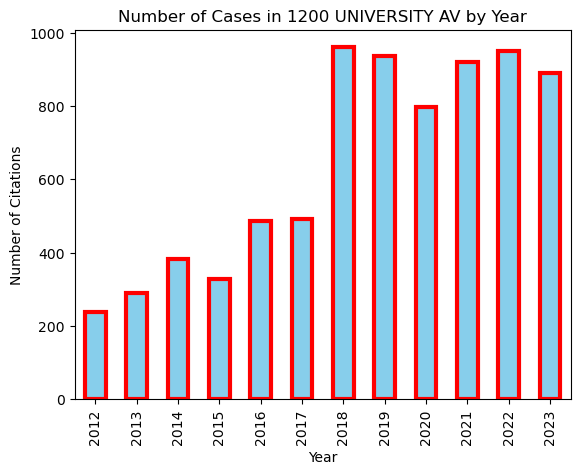

In [75]:
import pandas as pd
import matplotlib.pyplot as plt


a['location'] = a['location'].str.upper()

specific_location = '1200 UNIVERSITY AV'

location_data = a[a['location'] == specific_location].copy()

location_data['date_issue'] = pd.to_datetime(location_data['date_issue'])
location_data['year'] = location_data['date_issue'].dt.year

yearly_counts = location_data['year'].value_counts().sort_index()

yearly_counts.plot(kind='bar', color='skyblue', edgecolor='red', linewidth=3)

plt.xlabel('Year')
plt.ylabel('Number of Citations')
plt.title(f'Number of Cases in {specific_location} by Year')

plt.show()



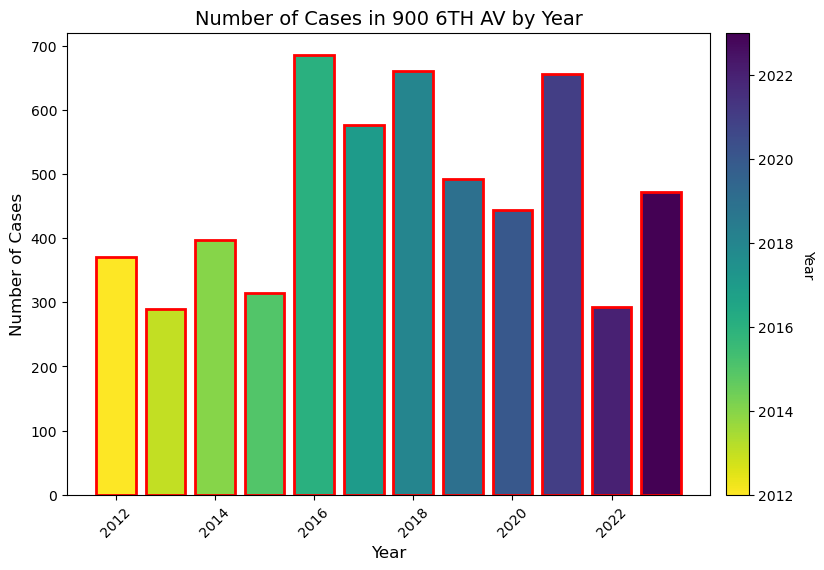

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# Assuming 'a' is your DataFrame with a 'location' and 'date_issue' column
a['location'] = a['location'].str.upper()

# Choose a specific location (e.g., '400 15TH ST')
specific_location = '900 6TH AV'

# Filter the DataFrame for the specific location and create a copy
location_data = a[a['location'] == specific_location].copy()

# Convert the 'date_issue' column to datetime format
location_data['date_issue'] = pd.to_datetime(location_data['date_issue'])

# Extract the year from the 'date_issue' column
location_data['year'] = location_data['date_issue'].dt.year

# Group by year and count the number of cases for each year
yearly_counts = location_data['year'].value_counts().sort_index()

# Create a bar chart with different colors for each year
fig, ax = plt.subplots(figsize=(10, 6))

# Use a colormap for distinct colors
cmap = plt.cm.viridis_r
normalize = Normalize(vmin=yearly_counts.index.min(), vmax=yearly_counts.index.max())

# Plot the bar graph with custom colors
bars = ax.bar(yearly_counts.index, yearly_counts, color=cmap(normalize(yearly_counts.index)), edgecolor='red', linewidth=2)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.title(f'Number of Cases in {specific_location} by Year', fontsize=14)
plt.xticks(rotation=45)

# Add a colorbar to show the correspondence between colors and years
cbar = plt.colorbar(cm.ScalarMappable(cmap=cmap, norm=normalize), ax=ax, pad=0.02)
cbar.set_label('Year', rotation=270, labelpad=15)

plt.show()





Enter the locationSKI BEACH LOT 3000 INGRAHAM STREET
SKI BEACH LOT 3000 INGRAHAM STREET


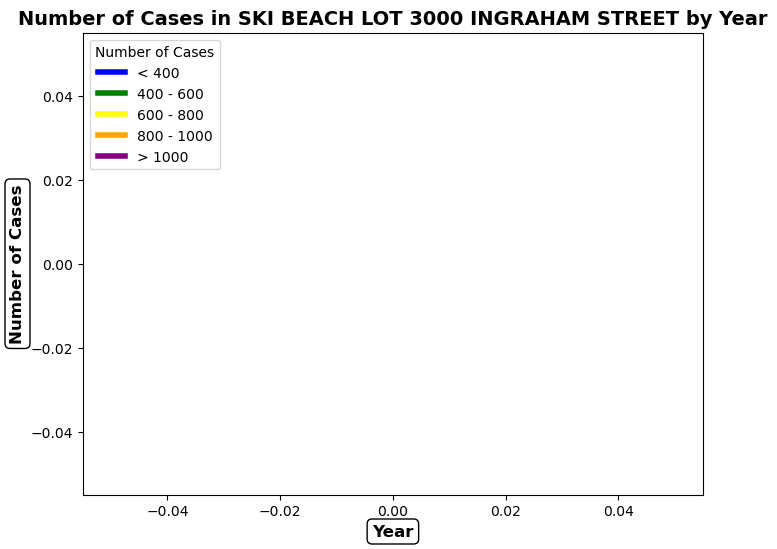

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

a['location'] = a['location'].str.upper()

specific_location = input("Enter the location")
print(specific_location)

location_data = a[a['location'] == specific_location].copy()

location_data['date_issue'] = pd.to_datetime(location_data['date_issue'])

location_data['year'] = location_data['date_issue'].dt.year

yearly_counts = location_data['year'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 6))

color_thresholds = [0, 400, 600, 800, 1000, float('inf')]
colors = ['blue', 'green', 'yellow', 'orange', 'purple']

color_indices = pd.cut(yearly_counts, bins=color_thresholds, labels=False, right=False)
color_list = [colors[i] for i in color_indices]

bars = ax.bar(yearly_counts.index, yearly_counts, color=color_list, edgecolor='red', linewidth=2)

# Make xlabel and ylabel bold with a border
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Cases', fontsize=12, fontweight='bold')

# Add a border around xlabel and ylabel
plt.setp(ax.xaxis.get_label(), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.setp(ax.yaxis.get_label(), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.title(f'Number of Cases in {specific_location} by Year', fontsize=14,fontweight='bold')
plt.xticks(rotation=0)

legend_labels = ['< 400', '400 - 600', '600 - 800', '800 - 1000', '> 1000']
legend_handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]

plt.legend(legend_handles, legend_labels, title='Number of Cases', loc='upper left')


plt.show()







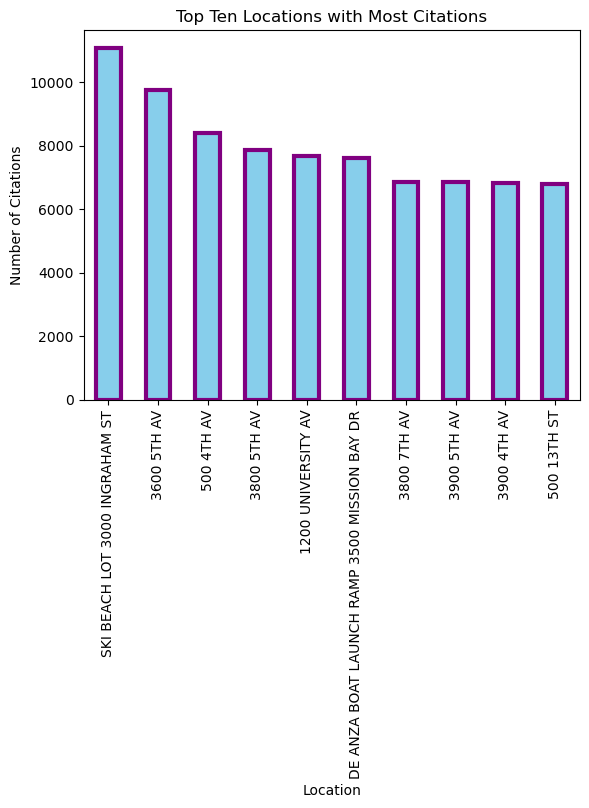

In [57]:
import pandas as pd
import matplotlib.pyplot as plt


a['location'] = a['location'].str.upper() 

location_counts = a['location'].value_counts().sort_values(ascending=False).head(10)
top_ten_locations = location_counts.head(10)


top_ten_locations.plot(kind='bar', color='skyblue',edgecolor='purple',
       linewidth=3)

plt.xlabel('Location')
plt.ylabel('Number of Citations')
plt.title('Top Ten Locations with Most Citations')
plt.xticks(rotation=90) 


plt.show()


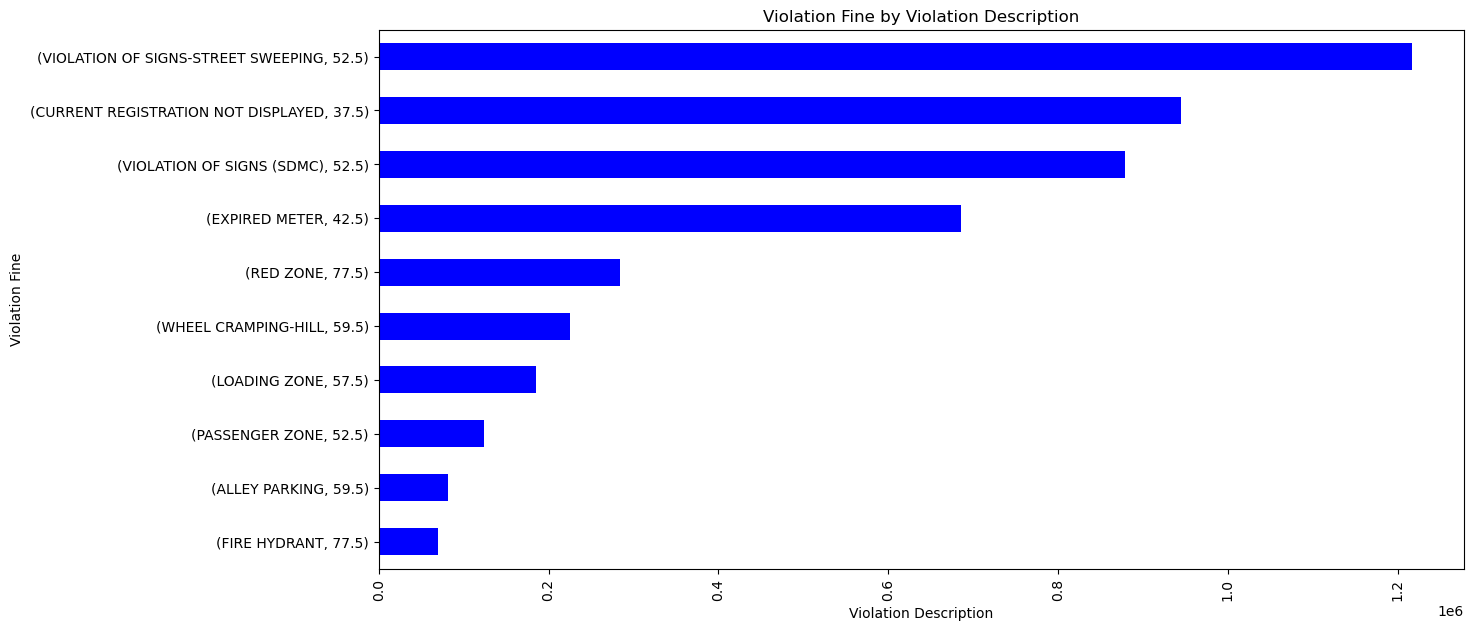

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

a['vio_desc'] = a['vio_desc'].str.upper() 

mean_fine_by_desc = a.groupby('vio_desc')['vio_fine'].value_counts().sort_values(ascending=False).head(10)
mean_fine_by_desc=mean_fine_by_desc.iloc[::-1]

mean_fine_by_desc.plot(kind='barh', color='blue', figsize=(14, 7)) 

plt.xlabel('Violation Description')
plt.ylabel('Violation Fine')
plt.title('Violation Fine by Violation Description')
plt.xticks(rotation=90)  

plt.show()


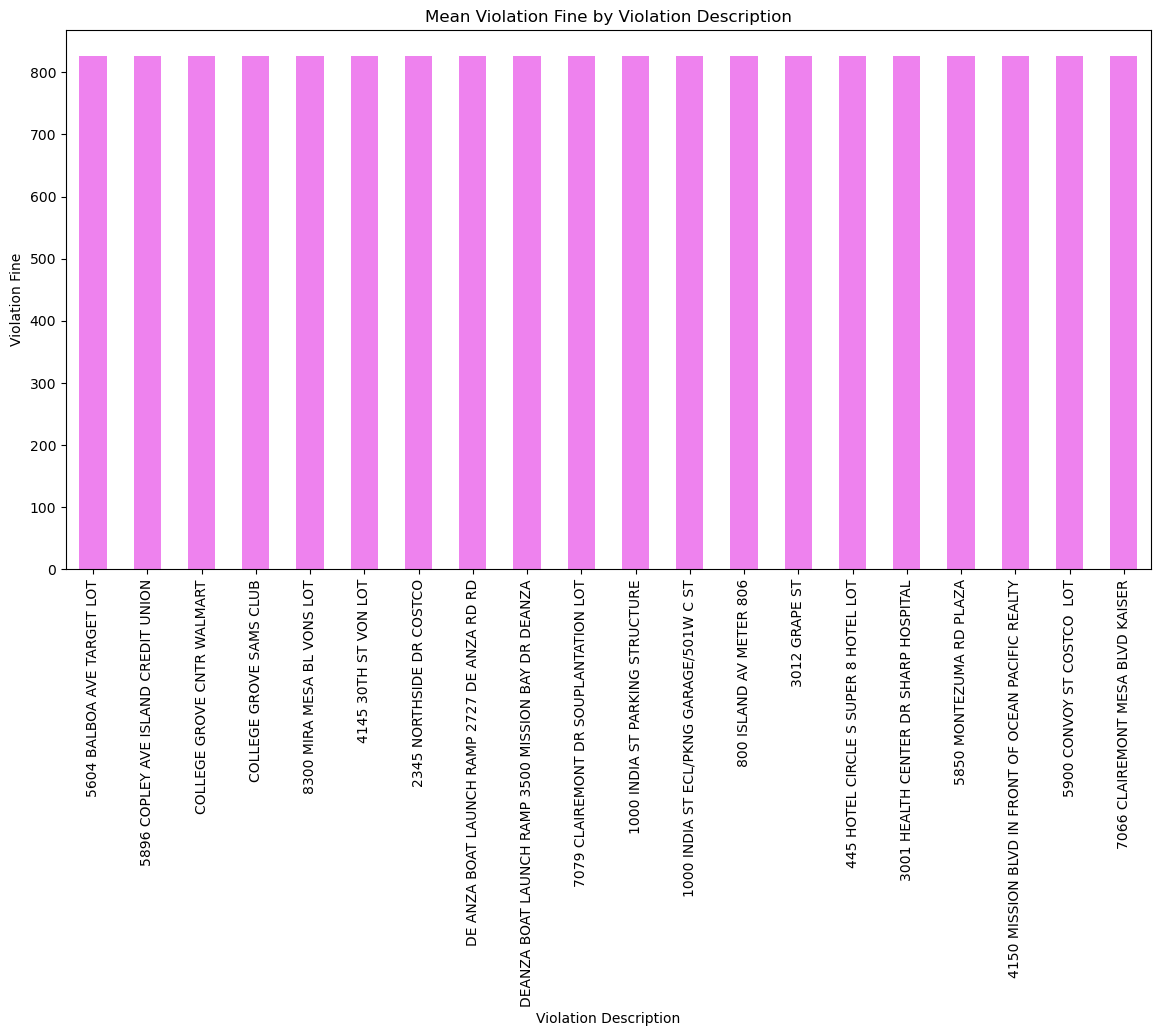

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

a['vio_desc'] = a['vio_desc'].str.upper()

mean_fine_by_desc = a.groupby('location')['vio_fine'].mean().sort_values(ascending=False).head(20)

mean_fine_by_desc.plot(kind='bar', color='violet', figsize=(14, 7))  

plt.xlabel('Violation Description')
plt.ylabel('Violation Fine')
plt.title('Mean Violation Fine by Violation Description')
plt.xticks(rotation=90) 

plt.show()

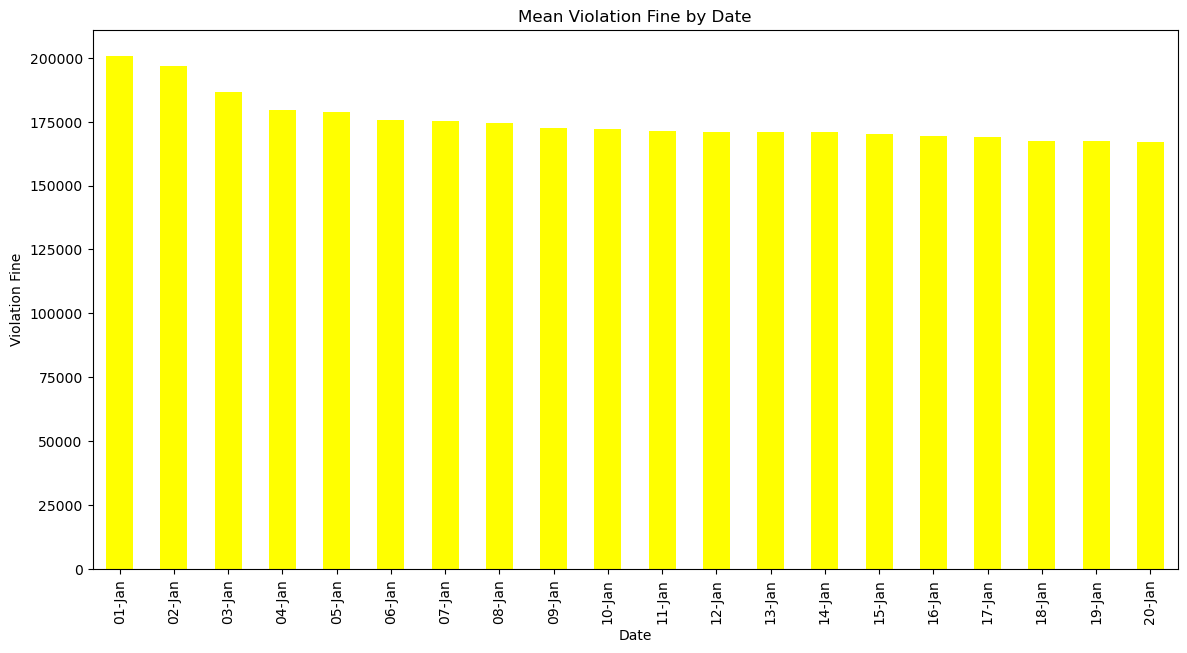

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
  

mean_fine_by_desc = a.groupby('date_issue')['vio_fine'].sum().sort_values(ascending=False).head(20)

mean_fine_by_desc.plot(kind='bar', color='yellow', figsize=(14, 7))  
date_format = DateFormatter("%d-%b")
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('Date')
plt.ylabel('Violation Fine')
plt.title('Mean Violation Fine by Date')
plt.xticks(rotation=90)  

plt.show()

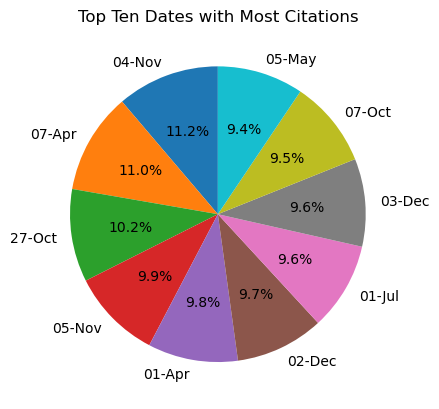

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

a['date_issue'] = pd.to_datetime(a['date_issue'])

daily_counts = a['date_issue'].value_counts().sort_values(ascending=False)

top_ten_dates = daily_counts.nlargest(10)

day_month_labels = top_ten_dates.index.strftime('%d-%b')

plt.pie(top_ten_dates, labels=day_month_labels, autopct='%1.1f%%', startangle=90)

plt.title('Top Ten Dates with Most Citations')

plt.show()



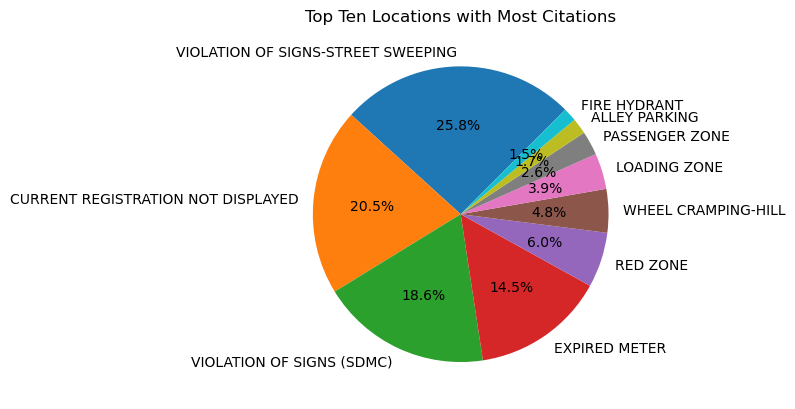

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

a['location'] = a['location'].str.upper() 

location_counts = a['vio_desc'].value_counts().sort_values(ascending=False)

top_ten_locations = location_counts.head(10)
plt.pie(top_ten_locations, labels=top_ten_locations.index, autopct='%1.1f%%', startangle=45)

plt.title('Top Ten Locations with Most Citations')

plt.show()


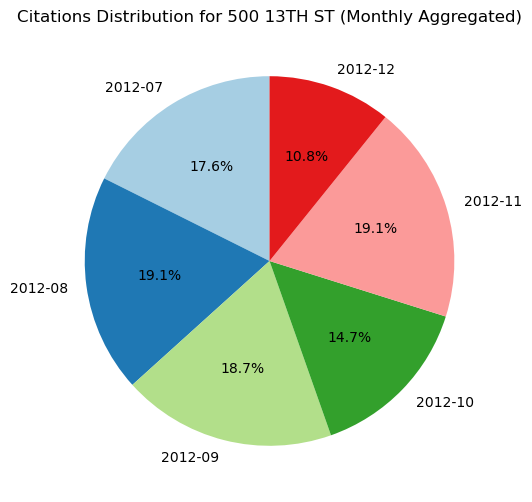

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Convert date columns to datetime format
df['date_issue'] = pd.to_datetime(df['date_issue'])
df['date_creation'] = pd.to_datetime(df['date_creation'])

# Extract month and year from the 'date_issue' column
df['month_year'] = df['date_issue'].dt.to_period('M')

# Choose a specific location for the pie chart (e.g., '500 16TH ST' in this case)
selected_location = '500 13TH ST'

# Filter data for the selected location
location_data = df[df['location'] == selected_location]

# Group by month_year and count the number of citations for each month
monthly_citations = location_data.groupby('month_year')['citation_id'].count()

# If any months are missing, fill in with zero values
all_months = pd.period_range(min(df['month_year']), max(df['month_year']), freq='M')
monthly_citations = monthly_citations.reindex(all_months, fill_value=0)

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(monthly_citations, labels=monthly_citations.index.astype(str), autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title(f'Citations Distribution for {selected_location} (Monthly Aggregated)')
plt.show()


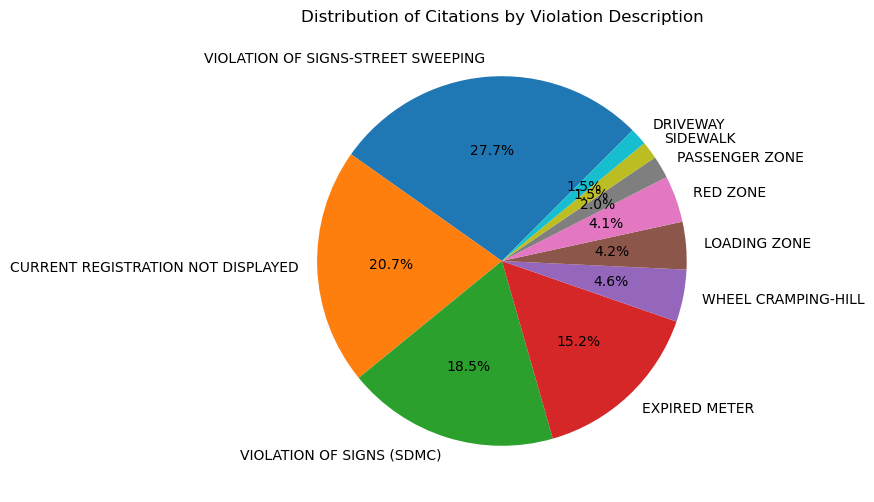

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Convert date columns to datetime format
df['date_issue'] = pd.to_datetime(df['date_issue'])
df['date_creation'] = pd.to_datetime(df['date_creation'])

# Extract month and year from the 'date_issue' column
df['month_year'] = df['date_issue'].dt.to_period('M')

# Group by 'vio_desc' and count the number of citations for each violation description
vio_desc_counts = df.groupby('vio_desc')['citation_id'].count().sort_values(ascending=False).head(10)

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(vio_desc_counts, labels=vio_desc_counts.index, autopct='%1.1f%%', startangle=45)
plt.title('Distribution of Citations by Violation Description')
plt.show()


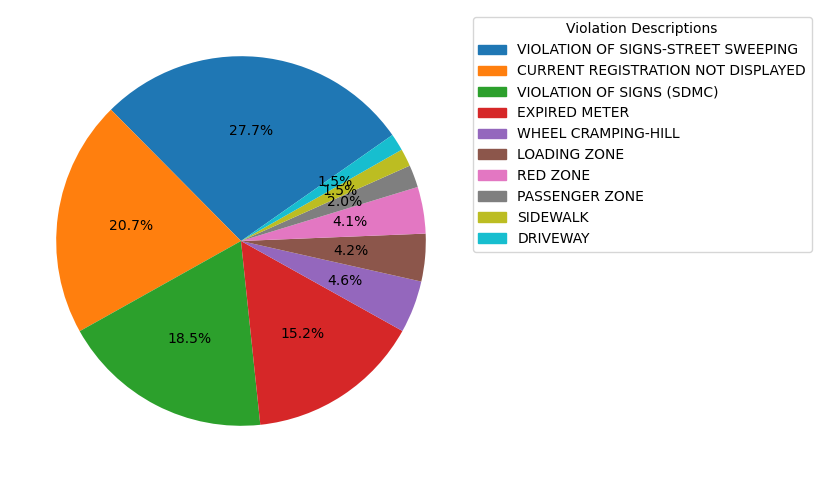

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Assuming 'df' is your DataFrame
# Convert date columns to datetime format
df['date_issue'] = pd.to_datetime(df['date_issue'])
df['date_creation'] = pd.to_datetime(df['date_creation'])

# Extract month and year from the 'date_issue' column
df['month_year'] = df['date_issue'].dt.to_period('M')

# Group by 'vio_desc' and count the number of citations for each violation description
vio_desc_counts = df.groupby('vio_desc')['citation_id'].count().sort_values(ascending=False).head(10)

# Plot the pie chart without labels
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(vio_desc_counts, labels=None, autopct='%1.1f%%', startangle=35)

# Create legends with colors
legend_labels = vio_desc_counts.index
legend_colors = [wedge.get_facecolor() for wedge in wedges]
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Adjust bbox_to_anchor values to position the legend
plt.legend(handles=legend_patches, loc='upper right', bbox_to_anchor=(1.75, 1), title='Violation Descriptions')

#plt.title('Distribution of Citations by Violation Description')
plt.show()


In [ ]:
pip install prettytable


In [87]:
import pandas as pd
from prettytable import PrettyTable


vivo_desc_counts = a['vio_desc'].value_counts().sort_values(ascending=False)
top_ten_vivo_desc = vivo_desc_counts.head(10)

table = PrettyTable()
table.field_names = ['vio_desc', 'Number of Citations']
table.border = True  
table.header = True  
table.align = 'l' 

for location, count in top_ten_vivo_desc.items():
    table.add_row([location, count])
    
print(table)


+------------------------------------+---------------------+
| vio_desc                           | Number of Citations |
+------------------------------------+---------------------+
| VIOLATION OF SIGNS-STREET SWEEPING | 1216729             |
| CURRENT REGISTRATION NOT DISPLAYED | 968340              |
| VIOLATION OF SIGNS (SDMC)          | 879701              |
| EXPIRED METER                      | 687031              |
| RED ZONE                           | 284655              |
| WHEEL CRAMPING-HILL                | 225046              |
| LOADING ZONE                       | 184806              |
| PASSENGER ZONE                     | 123990              |
| ALLEY PARKING                      | 81511               |
| FIRE HYDRANT                       | 70084               |
+------------------------------------+---------------------+


In [12]:
import pandas as pd
from prettytable import PrettyTable


date_counts = a['date_issue'].value_counts().sort_values(ascending=False)
top_ten_dates = date_counts.head(10)

table = PrettyTable()
table.field_names = ['date_issue', 'Number of Citations']
table.border = True  
table.header = True  
table.align = 'l' 

for location, count in top_ten_dates.items():
    table.add_row([location, count])
    
print(table) 

+------------+---------------------+
| date_issue | Number of Citations |
+------------+---------------------+
| 2020-11-04 | 3679                |
| 2021-04-07 | 3622                |
| 2020-10-27 | 3328                |
| 2020-11-05 | 3247                |
| 2021-04-01 | 3229                |
| 2020-12-02 | 3172                |
| 2021-07-01 | 3152                |
| 2020-12-03 | 3149                |
| 2015-10-07 | 3117                |
| 2021-05-05 | 3088                |
+------------+---------------------+


In [13]:
import pandas as pd

mean_fine_by_desc = a.groupby('vio_desc')['vio_fine'].value_counts().sort_values(ascending=False).head(20)
df_mean_fine = mean_fine_by_desc.reset_index(name='Count')
df_mean_fine = df_mean_fine.sort_values(by='vio_fine', ascending=False)
print(df_mean_fine)


                                   vio_desc  vio_fine    Count
13                         DISABLED PARKING     452.5    48766
17                     SIDEWALK ACCESS RAMP     302.5    29873
18    OVERSIZED/NON-MOTORIZED/RV PROHIBITED     112.5    29064
4                                  RED ZONE      77.5   284654
9                              FIRE HYDRANT      77.5    70084
14        RT WHEEL OVER 18 INCHES FROM CURB      59.5    47945
5                       WHEEL CRAMPING-HILL      59.5   225043
8                             ALLEY PARKING      59.5    81510
6                              LOADING ZONE      57.5   184805
11                                 DRIVEWAY      57.5    68244
12                                 SIDEWALK      57.5    67815
16  VEHICLE NOT MOVED 1/10 MILE IN 72 HOURS      53.5    31818
0        VIOLATION OF SIGNS-STREET SWEEPING      52.5  1216716
15                     RESIDENTIAL PERMIT A      52.5    36656
10                  RESIDENTIAL PERMIT AREA      52.5  

In [14]:
import pandas as pd

mean_fine_by_desc = a.groupby('vio_desc')['vio_fine'].value_counts().sort_values(ascending=False).head(20)
df_mean_fine = mean_fine_by_desc.reset_index(name='Count')
df_mean_fine = df_mean_fine.sort_values(by='Count', ascending=False)
print(df_mean_fine)


                                   vio_desc  vio_fine    Count
0        VIOLATION OF SIGNS-STREET SWEEPING      52.5  1216716
1        CURRENT REGISTRATION NOT DISPLAYED      37.5   944223
2                 VIOLATION OF SIGNS (SDMC)      52.5   879011
3                             EXPIRED METER      42.5   685856
4                                  RED ZONE      77.5   284654
5                       WHEEL CRAMPING-HILL      59.5   225043
6                              LOADING ZONE      57.5   184805
7                            PASSENGER ZONE      52.5   123987
8                             ALLEY PARKING      59.5    81510
9                              FIRE HYDRANT      77.5    70084
10                  RESIDENTIAL PERMIT AREA      52.5    69763
11                                 DRIVEWAY      57.5    68244
12                                 SIDEWALK      57.5    67815
13                         DISABLED PARKING     452.5    48766
14        RT WHEEL OVER 18 INCHES FROM CURB      59.5  

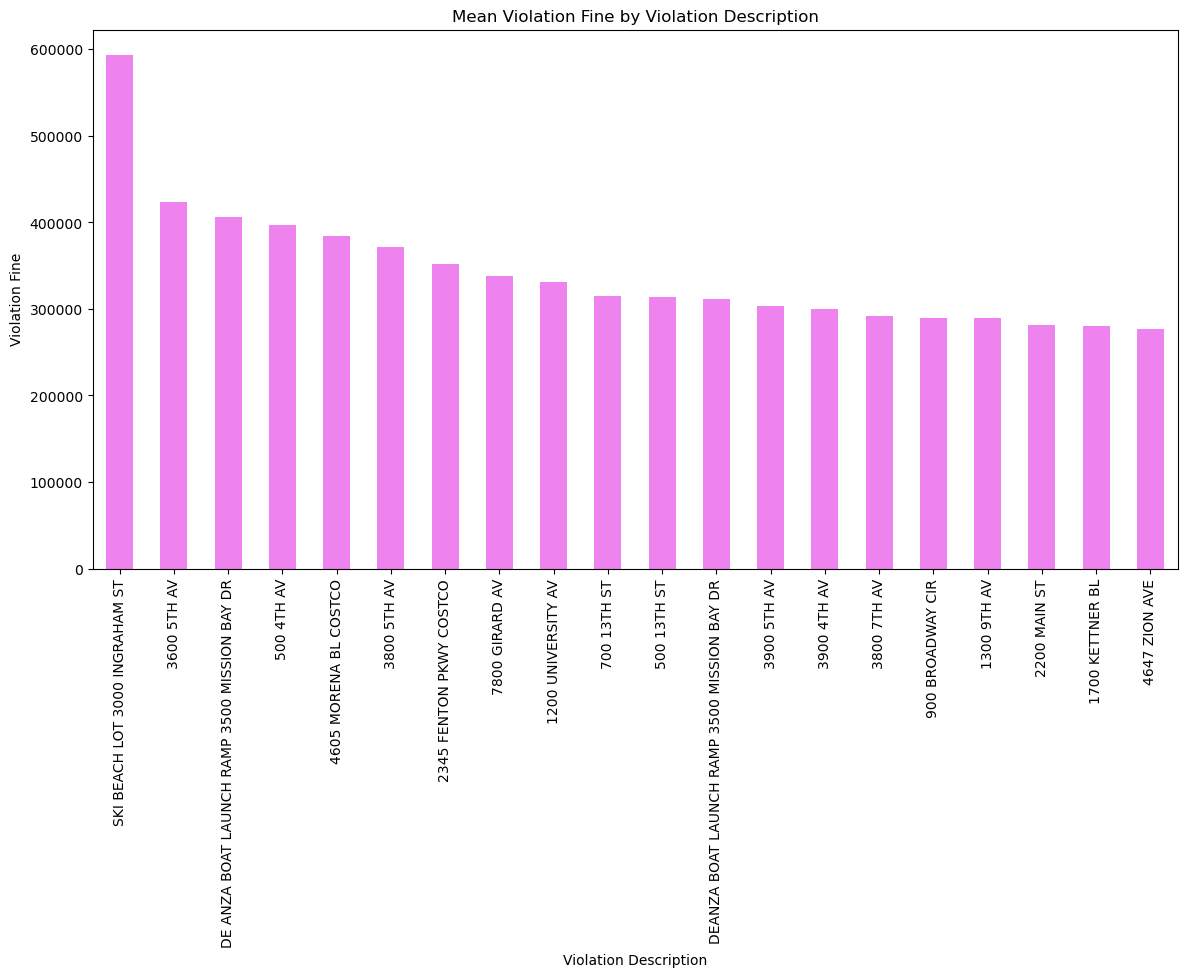

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

a['vio_desc'] = a['vio_desc'].str.upper()

mean_fine_by_desc = a.groupby('location')['vio_fine'].sum().sort_values(ascending=False).head(20)

mean_fine_by_desc.plot(kind='bar', color='violet', figsize=(14, 7))  

plt.xlabel('Violation Description')
plt.ylabel('Violation Fine')
plt.title('Mean Violation Fine by Violation Description')
plt.xticks(rotation=90) 

plt.show()

In [46]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import ipywidgets as widgets
from IPython.display import display

a['location'] = a['location'].str.upper()

search_widget = widgets.Text(value='', placeholder='Enter the location name', description='Location Name:')
output_widget = widgets.Output()

def search(location_name):
    with output_widget:
        output_widget.clear_output()
        specific_location = location_name.upper()

        location_data = a[a['location'] == specific_location].copy()

        location_data['date_issue'] = pd.to_datetime(location_data['date_issue'])
        location_data['year'] = location_data['date_issue'].dt.year

        yearly_counts = location_data['year'].value_counts().sort_index()

        fig, ax = plt.subplots(figsize=(8, 6))

        color_thresholds = [0, 400, 600, 800, 1000, float('inf')]
        colors = ['blue', 'green', 'yellow', 'orange', 'purple']

        color_indices = pd.cut(yearly_counts, bins=color_thresholds, labels=False, right=False)
        color_list = [colors[i] for i in color_indices]

        bars = ax.bar(yearly_counts.index, yearly_counts, color=color_list, edgecolor='red', linewidth=2)

        ax.set_xlabel('Year', fontsize=12, fontweight='bold')
        ax.set_ylabel('Number of Cases', fontsize=12, fontweight='bold')

        plt.setp(ax.xaxis.get_label(), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
        plt.setp(ax.yaxis.get_label(), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        plt.title(f'{specific_location}', fontsize=14, fontweight='bold')
        plt.xticks(rotation=0)

        legend_labels = ['< 400', '400 - 600', '600 - 800', '800 - 1000', '> 1000']
        legend_handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]

        plt.legend(legend_handles, legend_labels, title='Number of Cases', loc='upper left')
        plt.show()

widgets.interactive(search, location_name=search_widget)

display(search_widget)
display(output_widget)


Text(value='', description='Location Name:', placeholder='Enter the location name')

Output()

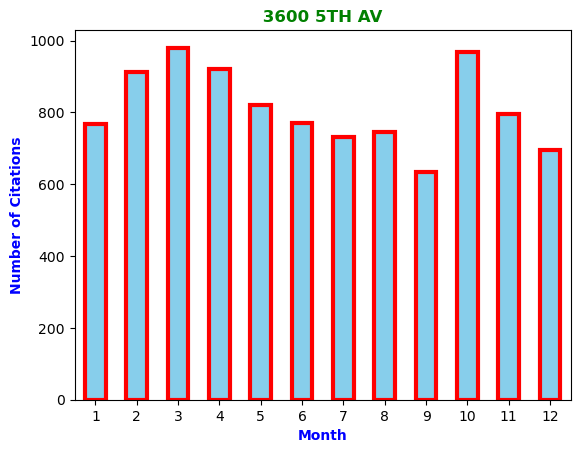

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

a['location'] = a['location'].str.upper()

specific_location = '3600 5TH AV'

location_data = a[a['location'] == specific_location].copy()

location_data['date_issue'] = pd.to_datetime(location_data['date_issue'])
location_data['month'] = location_data['date_issue'].dt.month

monthly_counts = location_data['month'].value_counts().sort_index()

monthly_counts.plot(kind='bar', color='skyblue', edgecolor='red', linewidth=3)

plt.xlabel('Month',fontdict={'fontsize':10,'fontweight':'bold','color':'blue'})
plt.ylabel('Number of Citations',fontdict={'fontsize':10,'fontweight':'bold','color':'blue'})
plt.title(f' {specific_location} ',fontdict={'fontsize':12,'fontweight':'bold','color':'green'})
plt.xticks(rotation=0)

plt.show()


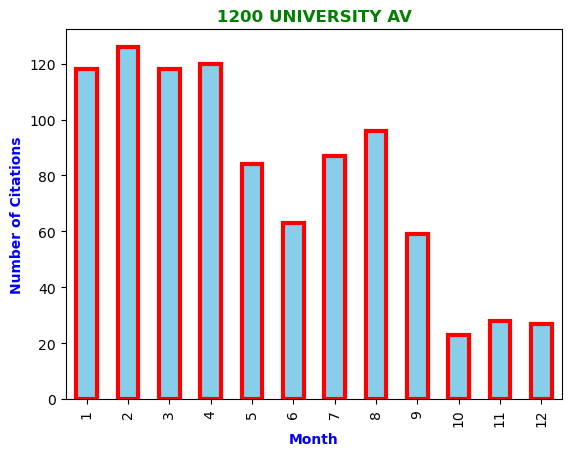

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

a['location'] = a['location'].str.upper()

specific_location = '1200 UNIVERSITY AV'

location_data = a[a['location'] == specific_location].copy()

location_data['date_issue'] = pd.to_datetime(location_data['date_issue'])
location_data['year'] = location_data['date_issue'].dt.year

# Filter data for the year 2022
location_data_2022 = location_data[location_data['year'] == 2022]

monthly_counts_2022 = location_data_2022['date_issue'].dt.month.value_counts().sort_index()

monthly_counts_2022.plot(kind='bar', color='skyblue', edgecolor='red', linewidth=3)





plt.xlabel('Month',fontdict={'fontsize':10,'fontweight':'bold','color':'blue'})
plt.ylabel('Number of Citations',fontdict={'fontsize':10,'fontweight':'bold','color':'blue'})
plt.title(f' {specific_location} ',fontdict={'fontsize':12,'fontweight':'bold','color':'green'})

#plt.xticks( ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


plt.show()


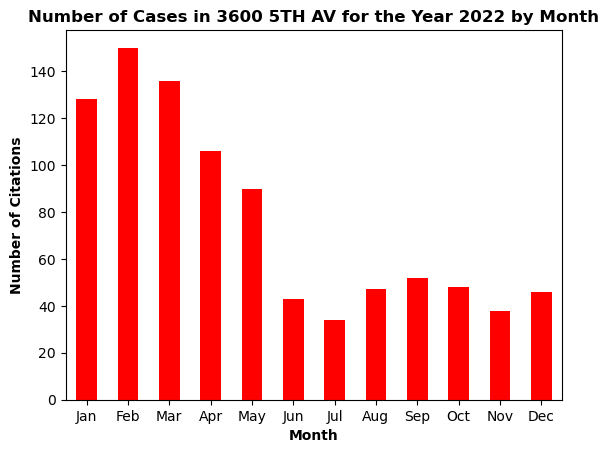

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

a['location'] = a['location'].str.upper()

specific_location = '3600 5TH AV'

location_data = a[a['location'] == specific_location].copy()

location_data['date_issue'] = pd.to_datetime(location_data['date_issue'])
location_data['month'] = location_data['date_issue'].dt.month_name()

# Filter data for the year 2022
location_data_2022 = location_data[location_data['date_issue'].dt.year == 2022]

monthly_counts_2022 = location_data_2022['month'].value_counts().reindex(calendar.month_name[1:]).fillna(0)

monthly_counts_2022.plot(kind='bar', color='red',)

plt.xlabel('Month', fontweight='bold',fontsize=10)
plt.ylabel('Number of Citations', fontweight='bold')
plt.title(f'Number of Cases in {specific_location} for the Year 2022 by Month', fontweight='bold')

# Customize the x-axis ticks to represent month names
plt.xticks(range(12), calendar.month_abbr[1:], rotation=0)

plt.show()


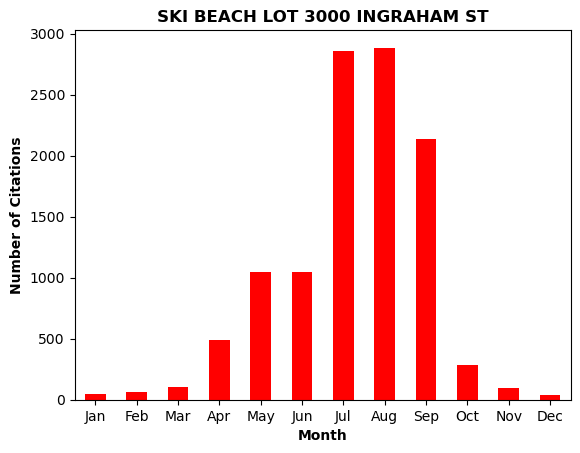

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

a['location'] = a['location'].str.upper()

specific_location = 'SKI BEACH LOT 3000 INGRAHAM ST'

location_data = a[a['location'] == specific_location].copy()

location_data['date_issue'] = pd.to_datetime(location_data['date_issue'])
location_data['month'] = location_data['date_issue'].dt.month_name()

monthly_counts = location_data['month'].value_counts().reindex(calendar.month_name[1:]).fillna(0)

monthly_counts.plot(kind='bar', color='red')

plt.xlabel('Month', fontdict={'fontsize': 10, 'fontweight': 'bold'})
plt.ylabel('Number of Citations', fontdict={'fontsize': 10, 'fontweight': 'bold'})
plt.title(f'{specific_location}', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xticks(range(12), calendar.month_abbr[1:], rotation=0)

plt.show()
